# Modelo de predicción de medallas para Juegos Olímpicos
 En nuestro presente proyecto pondremos a prueba diferentes tipos de modelos para tratar de reponder la siguiente pregunta ¿Es posible predecir cuantas medallas obtendrá un país con base en su historial en las olimpiadas?

Veremos si los modelos mas utilizados son capaces de responder esta pregunta y con que precisión.

In [ ]:
#Lo primero será importar las librerias que queremos utilizar, para ello utilizarremos pandas (para el análisis y manipulación de los datos)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Lo siguiente será importar la base de datos de los medallistas olimpicos, y la vamos a imprimir para oberservarla
teams=pd.read_csv("https://raw.githubusercontent.com/JFRo57/Movies-Dataset/main/teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
#Despues haremos una copia del Dataset solo para tener un respaldo por precaución
teams2=teams.copy()
#Despues de eso eliminaremos la columna de 3 medallas previas (veremos como sale el modelo sin ella de momento)
teams2=teams2[["team","country","year","events","athletes","age","height","weight","medals","prev_medals"]]

#Acá podemos eliminar tambien haciendo uso de la instrucción dropped
#teams2_dropped=teams2.drop(columns=['prev_3_medals'])

teams2

,team,country,year,events,athletes,age,height,weight,medals,prev_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0


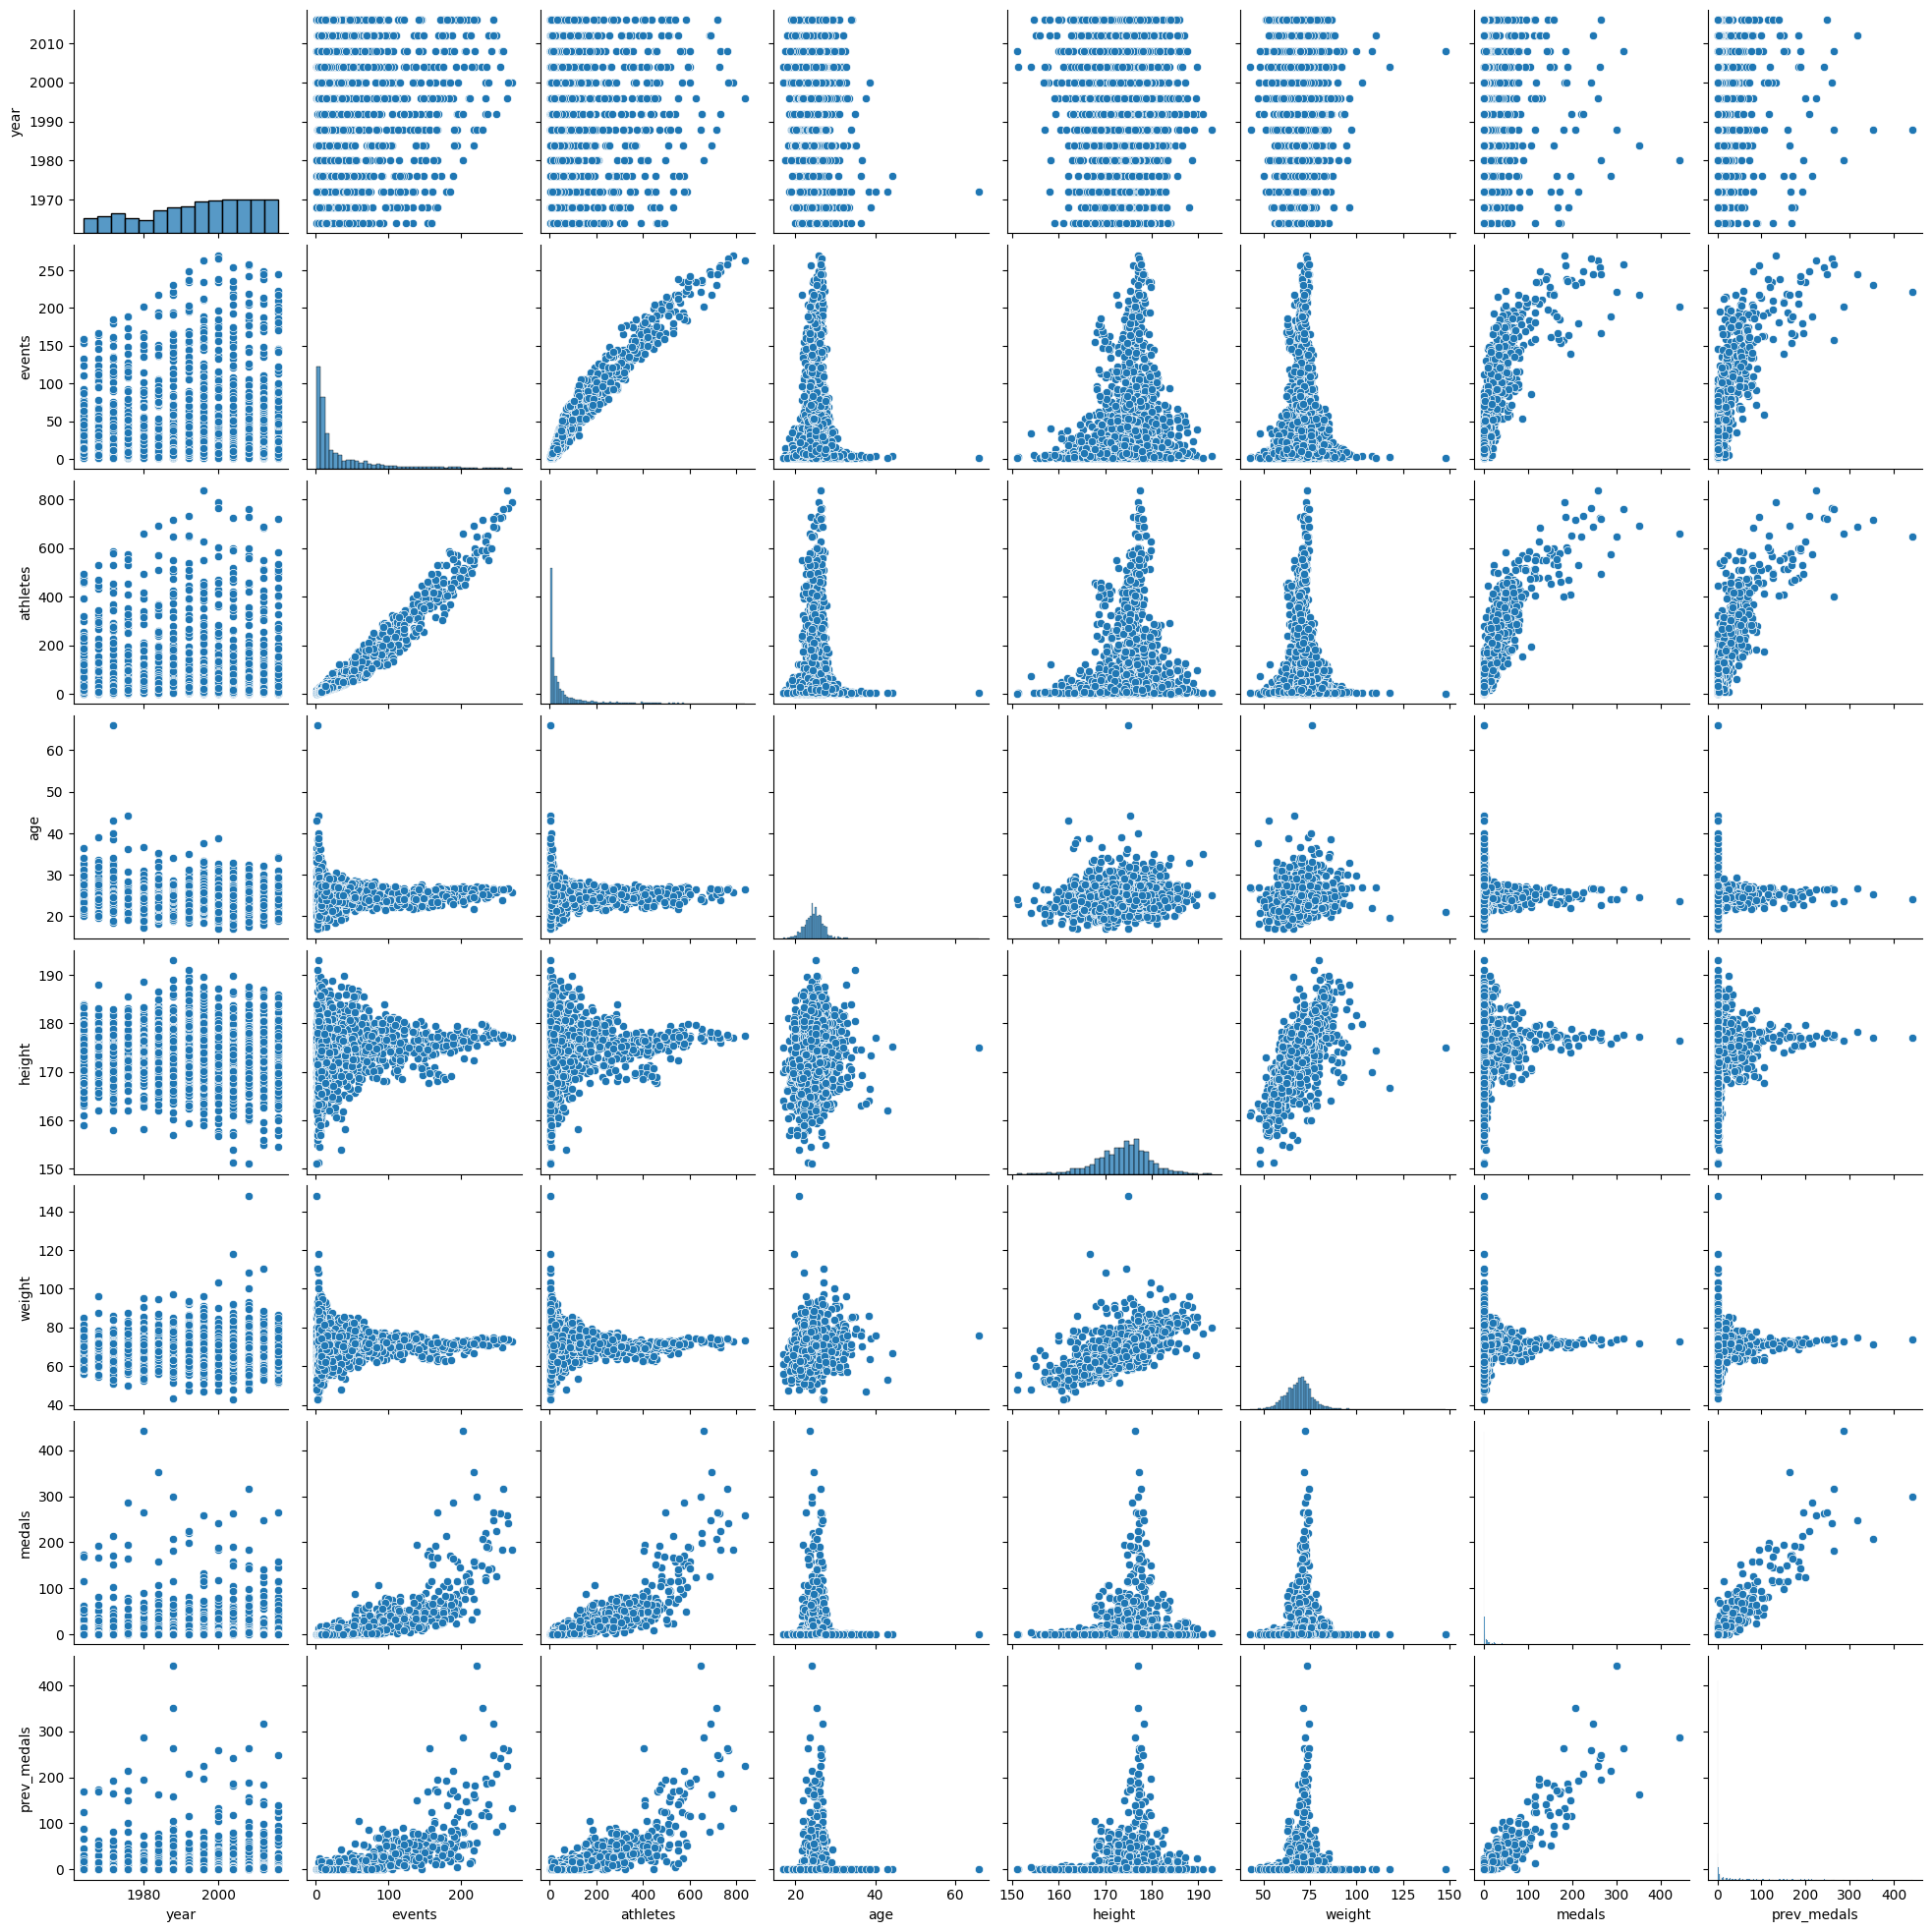

In [ ]:
sns.pairplot(teams2);

In [ ]:
#Ahora veremos los tipos de datos que existen en la tabla
teams2.dtypes

team            object
country         object
year             int64
events           int64
athletes         int64
age            float64
height         float64
weight         float64
medals           int64
prev_medals    float64
dtype: object

In [ ]:
#Comprobaremos si existe información a priori que no contenga datos relevantes
teams2[teams2.isnull().any(axis=1)]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,157.0,57.0,0,NaN
2103,YAR,North Yemen,1984,3,3,27.7,163.3,57.7,0,NaN
2105,YEM,Yemen,1992,8,8,19.6,169.0,60.0,0,NaN
2112,YMD,South Yemen,1988,5,5,23.6,175.0,63.3,0,NaN


In [ ]:
#Es importante eliminar aquellos datos que no nos sirven para el análisis debido a que no tienen datos registrados NaN (o formatos no compatibles)
#Es por ello que procederemos a eliminarlos
teams2=teams2.dropna()
teams2

,team,country,year,events,athletes,age,height,weight,medals,prev_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0


In [ ]:
#Debido a que tenemos mucha diferencia entre países, veremos cual es la mayor cantidad de
#medallas que un país haya ganado en una competencia y quien lo ganó
max_medallas = teams2['medals'].max()
print("El máximo número de medallas es:", max_medallas)
indice_max_medallas = teams2['medals'].idxmax()
equipo_max_medallas = teams2.loc[indice_max_medallas, 'team']
print("El equipo que obtuvo el máximo número de medallas es:", equipo_max_medallas)


El máximo número de medallas es: 442
El equipo que obtuvo el máximo número de medallas es: URS


In [ ]:
#Definiremos 89 clases para los diferentes rangos de ganadores de medallas en
#cada una de estas clases se esta tomando en cuenta que se ganan entre 0-5 medallas
# de diferencia.



# Definir las etiquetas de clase
def assign_class(num_medals):
    return num_medals // 5  # Dividir el número de medallas entre 5 para asignar la clase

# Crear las etiquetas de clase
teams2['class'] = teams2['medals'].apply(assign_class)

# Codificar las etiquetas de clase
label_encoder = LabelEncoder()
teams2['class_encoded'] = label_encoder.fit_transform(teams2['class'])

# Filtrar datos para incluir solo años anteriores a 2012
train = teams2[teams2["year"] < 2012].copy()

# Seleccionar características y etiquetas para entrenamiento
X_train = train[['athletes', 'prev_medals']]
y_train = train['class_encoded']

# Entrenar el modelo de clasificación
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
classifier.fit(X_train, y_train)

# Evaluar el modelo (opcional)
accuracy = classifier.score(X_train, y_train)
print("Accuracy:", accuracy)


<ipython-input-9-1f369bfe8d01>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams2['class'] = teams2['medals'].apply(assign_class)
<ipython-input-9-1f369bfe8d01>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams2['class_encoded'] = label_encoder.fit_transform(teams2['class'])


Accuracy: 0.7290242386575513


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Filtrar datos para incluir solo el equipo de México en 2016
mexico_2016 = teams2[(teams2["team"] == "MEX") & (teams2["year"] == 2016)]

# Seleccionar características para el equipo de México en 2016
X_mexico_2016 = mexico_2016[['athletes', 'prev_medals']]

# Realizar predicciones con el modelo de clasificación
predictions_mexico_2016 = classifier.predict(X_mexico_2016)

# Decodificar las predicciones a etiquetas originales
predicted_classes = label_encoder.inverse_transform(predictions_mexico_2016)

# Agregar las predicciones al DataFrame original
mexico_2016['predicted_class'] = predicted_classes

# Mostrar los resultados
print(mexico_2016)


     team country  year  events  athletes   age  height  weight  medals  \
1286  MEX  Mexico  2016      80       139  25.4   173.0    67.5       5   

      prev_medals  class  class_encoded  predicted_class  
1286         24.0      1              1               10  


<ipython-input-12-760a75548749>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico_2016['predicted_class'] = predicted_classes


In [ ]:
# Filtrar datos para incluir solo el equipo de Estados Unidos en 2016
usa_2016 = teams2[(teams2["team"] == "USA") & (teams2["year"] == 2016)]

# Seleccionar características para el equipo de Estados Unidos en 2016
X_usa_2016 = usa_2016[['athletes', 'prev_medals']]

# Realizar predicciones con el modelo de clasificación
predictions_usa_2016 = classifier.predict(X_usa_2016)

# Decodificar las predicciones a etiquetas originales
predicted_classes_usa = label_encoder.inverse_transform(predictions_usa_2016)

# Agregar las predicciones al DataFrame original
usa_2016['predicted_class'] = predicted_classes_usa

# Mostrar los resultados
print(usa_2016)


     team        country  year  events  athletes   age  height  weight  \
2054  USA  United States  2016     245       719  26.4   178.0    73.8   

      medals  prev_medals  class  class_encoded  predicted_class  
2054     264        248.0     52             44               34  


<ipython-input-13-58d99d046a23>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_2016['predicted_class'] = predicted_classes_usa


In [ ]:
"""Una vez haciendo todo esto podemos ver lo siguiente:
Desde el principio, los datos estaban muy sesgados debido a que países como
EU o Rusia lideran los medalleros y existen países que no pueden contribuir
a los modelos debido a que no tienen participación o que no lograron obtener medallas

Como vimos, se cambió el modelo para no hacer una prediccion sino una clasificación
e intentar hacer clases para intentar reducir el error pero fue inutil, en consecuencia
se optó por hacer un modelo con los datos de cada país individualmente pero debido
a que los JO se hacen cada 4 años se carece de la cantidad de datos necesaria para este método"""